In [1]:
from ipynb.fs.full.config_helper import get_agg_config

import warnings
warnings.filterwarnings("ignore")

In [2]:
NUM_OF_PARTIES = 20
ROUNDS = 150
EPOCHS = 3

dataset='femnist'

In [3]:
from ibmfl.aggregator.aggregator import Aggregator

agg_config = get_agg_config(NUM_OF_PARTIES, ROUNDS, EPOCHS)
aggregator = Aggregator(config_dict=agg_config)

aggregator.start()

Yaml configuration file not found: log_config.yaml


2021-06-12T06:33:01.803Z | 1.0.5 | INFO | ibmfl.util.config                                  | Getting Aggregator details from arguments.
2021-06-12T06:33:01.803Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-12T06:33:01.803Z | 1.0.5 | INFO | ibmfl.util.config                                  | No metrics recorder config provided for this setup.
2021-06-12T06:33:01.804Z | 1.0.5 | INFO | ibmfl.util.config                                  | No model config provided for this setup.
2021-06-12T06:33:02.170Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-12T06:33:02.171Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | RestSender initialized
2021-06-12T06:33:02.172Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.START
2021-06-12T06:33:02.172Z | 1.0.5 | INFO | ibmfl.connection.flask_connection 

2021-06-12T06:33:56.634Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-12T06:33:56.635Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party13
2021-06-12T06:33:56.636Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:13
2021-06-12T06:33:56.637Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:33:56] "POST /6 HTTP/1.1" 200 -
2021-06-12T06:33:59.871Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-12T06:33:59.872Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party14
2021-06-12T06:33:59.873Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:14
2021-06-12T06:33:59.874Z | 1.0.5 | INFO | werkzeug                               

In [4]:
eval_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
eval_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
train_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
train_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
iterations = [[] for _ in range(NUM_OF_PARTIES)]

def get_metrics(metrics):
    keys = list(metrics['party'].keys())
    keys.sort()
    for i in range(len(keys)):
        eval_party_acc[i].append(metrics['party'][keys[i]]['test']['acc'])
        eval_party_loss[i].append(metrics['party'][keys[i]]['test']['loss'])
        train_party_acc[i].extend(metrics['party'][keys[i]]['train']['acc'])
        train_party_loss[i].extend(metrics['party'][keys[i]]['train']['loss'])
        iterations[i].append(metrics['fusion']['curr_round']*agg_config['hyperparams']['local']['training']['epochs'])

mh = aggregator.fusion.metrics_manager
mh.register(get_metrics)


aggregator.start_training()

2021-06-12T06:34:28.622Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating Global Training.
2021-06-12T06:34:28.623Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Warm start disabled.
2021-06-12T06:34:28.624Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model updateNone
2021-06-12T06:34:28.624Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T06:34:28.625Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T06:34:29.333Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T06:34:29.334Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T06:34:29.334Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T06:34:29.335

2021-06-12T06:35:53.591Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:35:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:35:53.621Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:35:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:35:53.660Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:35:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:35:54.420Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:85
2021-06-12T06:35:54.421Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T06:35:54.422Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T06:35:54.422Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T06:35:54.494Z | 1.0.5 | IN

2021-06-12T06:36:36.264Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:36:36] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:36:36.740Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T06:36:36.741Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T06:36:36.742Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T06:36:36.742Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T06:36:36.784Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f7231dc3320>
2021-06-12T06:36:36.786Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T06:36:36.787Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-12T06:37:19.299Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T06:37:19.299Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T06:37:19.335Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f7231d52f98>
2021-06-12T06:37:19.336Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T06:37:19.337Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T06:37:21.417Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T06:37:21.418Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T06:37:21.418Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-12T06:38:02.095Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T06:38:02.096Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T06:38:04.017Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T06:38:04.018Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T06:38:04.019Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T06:38:04.019Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T06:38:09.029Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T06:38:14.032Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12

2021-06-12T06:38:46.935Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T06:38:46.935Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T06:38:46.936Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T06:38:51.941Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T06:38:56.949Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T06:39:01.961Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T06:39:06.965Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T06:39:11.968Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T06:39:16

2021-06-12T06:39:34.008Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T06:39:39.024Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T06:39:44.028Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T06:39:49.036Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T06:39:54.040Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T06:39:59.044Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T06:40:04.048Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T06:40:06.501Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:40:06.846

2021-06-12T06:40:30.970Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T06:40:35.976Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T06:40:40.997Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T06:40:45.160Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:40:45.699Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:40:45] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:40:46.000Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T06:40:47.289Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:40:47.583Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - 

2021-06-12T06:41:26.204Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:41:26.618Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:41:26] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:41:27.821Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:41:27.952Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:41:28.227Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:41:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:41:28.228Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T06:41:28.943Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:41:28.946Z | 1.0.5 | INFO | werkzeug                  

2021-06-12T06:42:06.825Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:42:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:42:11.000Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T06:42:12.652Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:42:12.763Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:42:12] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:42:12.763Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:42:12.833Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:42:12] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:42:13.072Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:42:13.159Z | 1.0.5 | 

2021-06-12T06:42:53.653Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T06:42:53.655Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:42:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:42:53.657Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:42:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:42:54.188Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:42:54.476Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:42:54] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:42:55.483Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:42:55.573Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:42:55] "POST /7 HTTP/1.1" 200 -
20

2021-06-12T06:43:38.272Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:43:38.347Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:43:38] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:43:38.696Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:43:38.744Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:43:38.748Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:43:38.756Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:43:38.795Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:43:38] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:43:38.799Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T06:44:20.832Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:44:20.878Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:44:20] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:44:20.916Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:44:20.918Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:44:20] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:44:20.987Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:44:20.988Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:44:20] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:44:20.989Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:44:20.993Z | 1.0.5 

2021-06-12T06:45:02.957Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:45:02] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:45:02.998Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:45:02] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:45:03.024Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:45:03.056Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:45:03.095Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:45:03] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:45:03.099Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:45:03.135Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:45:03] "POST /7 HTTP/1.1" 200 -


2021-06-12T06:45:45.463Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:45:45.464Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:45:45.510Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:45:45] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:45:45.511Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:45:45.567Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:45:45.568Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:45:45] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:45:45.590Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:45:45] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:45:45.591Z | 1.0.5 

2021-06-12T06:46:28.653Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:46:28.656Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:46:28.694Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:46:28.695Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:46:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:46:28.776Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:46:28.776Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:46:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:46:28.777Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:46:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:46:28.822Z | 1.0.5 

2021-06-12T06:47:10.299Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:47:10] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:47:10.354Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:47:10] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:47:10.355Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:47:10] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:47:10.356Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:47:10.357Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:47:10.359Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:47:10.361Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:47:10.362Z | 1.0.5 

2021-06-12T06:47:52.290Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:47:52.292Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:47:52.306Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:47:52.328Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:47:52.329Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:47:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:47:52.369Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:47:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:47:52.415Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:47:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:47:52.468Z | 1.0.5 

2021-06-12T06:48:35.031Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:48:35] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:48:35.032Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:48:35.067Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:48:35.069Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:48:35] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:48:35.071Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:48:35.107Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:48:35] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:48:35.177Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:48:35] "POST /7 HTTP/1.1" 200 -


2021-06-12T06:49:16.766Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:49:16.803Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:49:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:49:16.855Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:49:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:49:16.911Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:49:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:49:16.912Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:49:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:49:16.948Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:49:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:49:16.984Z | 1.0.5 | INFO | werkzeug                                         

2021-06-12T06:50:00.015Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:50:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:50:00.036Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:50:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:50:00.070Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:50:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:50:00.106Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:50:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:50:00.180Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:50:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:50:00.181Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:50:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:50:00.216Z | 1.0.5 | INFO | werkzeug        

2021-06-12T06:50:44.791Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:50:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:50:44.805Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:50:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:50:44.826Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:50:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:50:44.898Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:50:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:50:44.899Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:50:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:50:46.030Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T06:50:46.030Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-12T06:51:26.559Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:51:26] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:51:26.581Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:51:26] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:51:26.620Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:51:26] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:51:27.867Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T06:51:27.867Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T06:51:27.868Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T06:51:27.869Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T06:51:27.915Z | 1.0.5 | IN

2021-06-12T06:52:08.462Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:52:08] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:52:10.111Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T06:52:10.111Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T06:52:10.112Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T06:52:10.113Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T06:52:10.151Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f7231dc3208>
2021-06-12T06:52:10.152Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T06:52:10.152Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-12T06:52:52.304Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T06:52:52.305Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T06:52:52.356Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f72480fc710>
2021-06-12T06:52:52.357Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T06:52:52.357Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T06:52:54.572Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T06:52:54.574Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T06:52:54.574Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-12T06:53:34.810Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T06:53:34.810Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T06:53:36.738Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T06:53:36.739Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T06:53:36.740Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T06:53:36.740Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T06:53:41.744Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T06:53:46.748Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12

2021-06-12T06:54:20.065Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T06:54:20.066Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T06:54:20.068Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T06:54:25.072Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T06:54:30.076Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T06:54:35.084Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T06:54:40.088Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T06:54:45.092Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T06:54:49

2021-06-12T06:55:07.601Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T06:55:12.616Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T06:55:17.624Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T06:55:22.629Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T06:55:27.636Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T06:55:32.652Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T06:55:34.248Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:55:34.425Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:55:35.3

2021-06-12T06:56:04.832Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T06:56:09.843Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T06:56:14.849Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T06:56:17.627Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:56:18.517Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:56:18] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:56:19.860Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T06:56:20.213Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:56:20.584Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - 

2021-06-12T06:56:59.235Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:57:00.038Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:57:00.040Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:57:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:57:00.397Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:57:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:57:01.436Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:57:02.188Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:57:02] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:57:02.400Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T06:57:03.960Z | 1.0.5 | 

2021-06-12T06:57:43.928Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:57:43.931Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:57:43] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:57:44.599Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:57:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:57:44.599Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T06:57:46.764Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:57:46.840Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:57:46] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:57:47.076Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:57:47.168Z | 1.0.5 | 

2021-06-12T06:58:29.596Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:58:29] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:58:29.852Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:58:29.934Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:58:29] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:58:30.012Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:58:30.068Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:58:30.072Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:58:30.108Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:58:30] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:58:30.144Z | 1.0.5 

2021-06-12T06:59:08.313Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:59:08.755Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:59:08] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:59:08.788Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:59:09.082Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:59:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:59:09.708Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T06:59:10.940Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:59:11.022Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:59:11] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:59:11.200Z | 1.0.5 | 

2021-06-12T06:59:54.668Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:59:54.714Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:59:54] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:59:54.752Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:59:54] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:59:54.753Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:59:54.790Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:59:54.791Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 06:59:54] "POST /7 HTTP/1.1" 200 -
2021-06-12T06:59:54.794Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T06:59:54.796Z | 1.0.5 

2021-06-12T07:00:37.301Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:00:37.302Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:00:37.345Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:00:37.346Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:00:37] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:00:37.348Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:00:37.396Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:00:37] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:00:37.419Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:00:37.420Z | 1.0.5 | INFO | werkzeug                

2021-06-12T07:01:20.318Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:01:20.341Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:01:20.362Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:01:20] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:01:20.364Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:01:20.386Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:01:20.428Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:01:20] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:01:20.453Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:01:20.453Z | 1.0.5 | INFO | werkzeug                

2021-06-12T07:02:02.509Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:02:02.509Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:02:02] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:02:02.510Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:02:02.512Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:02:02.512Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:02:02.514Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:02:02.515Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:02:02.517Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-12T07:02:44.075Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:02:44.109Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:02:44.110Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:02:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:02:44.144Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:02:44.145Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:02:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:02:44.146Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:02:44.147Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:02:44.148Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T07:03:25.948Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:03:25.949Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:03:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:03:25.950Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:03:25.951Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:03:25.953Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:03:25.990Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:03:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:03:26.026Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:03:26] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:03:26.093Z | 1.0.5 

2021-06-12T07:04:07.541Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:04:07.564Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:04:07] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:04:07.565Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:04:07.578Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:04:07.598Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:04:07] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:04:07.600Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:04:07.714Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:04:07] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:04:07.731Z | 1.0.5 

2021-06-12T07:04:48.994Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:04:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:04:49.030Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:04:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:04:49.068Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:04:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:04:49.120Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:04:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:04:49.142Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:04:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:04:49.210Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:04:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:04:49.211Z | 1.0.5 | INFO | werkzeug        

2021-06-12T07:05:31.318Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:05:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:05:31.355Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:05:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:05:31.408Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:05:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:05:31.432Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:05:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:05:31.469Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:05:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:05:31.513Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:05:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:05:31.549Z | 1.0.5 | INFO | werkzeug        

2021-06-12T07:06:15.358Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:06:15] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:06:15.429Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:06:15] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:06:15.430Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:06:15] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:06:15.467Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:06:15] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:06:15.506Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:06:15] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:06:15.541Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:06:15] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:06:16.923Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-12T07:06:57.391Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:06:57] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:06:57.426Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:06:57] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:06:57.498Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:06:57] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:06:57.499Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:06:57] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:06:59.355Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T07:06:59.356Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T07:06:59.357Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-12T07:07:39.685Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:07:39] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:07:39.726Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:07:39] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:07:41.698Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T07:07:41.699Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T07:07:41.699Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T07:07:41.700Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T07:07:41.747Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f724f048ba8>
2021-06-12T07:07:41.748

2021-06-12T07:08:23.700Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T07:08:23.701Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T07:08:23.701Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T07:08:23.702Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T07:08:23.739Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f7231db1b38>
2021-06-12T07:08:23.740Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T07:08:23.741Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T07:08:26.072Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-12T07:09:06.158Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T07:09:06.206Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f72320ff780>
2021-06-12T07:09:06.207Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T07:09:06.208Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T07:09:08.142Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T07:09:08.143Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T07:09:08.144Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T07:09:08.146Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-12T07:09:48.240Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T07:09:50.111Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T07:09:50.115Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T07:09:50.117Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T07:09:50.118Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T07:09:55.129Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T07:10:00.135Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T07:10:05.140Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T07

2021-06-12T07:10:32.108Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T07:10:32.108Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T07:10:37.112Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T07:10:42.116Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T07:10:47.121Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T07:10:52.127Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T07:10:57.136Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T07:11:02.144Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T07:11:05.9

2021-06-12T07:11:24.537Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T07:11:29.540Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T07:11:34.557Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T07:11:39.568Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T07:11:44.579Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T07:11:46.706Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:11:46.895Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:11:46.903Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:11:46] "POST /7 H

2021-06-12T07:12:22.920Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T07:12:25.234Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:12:25.854Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:12:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:12:26.587Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:12:27.152Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:12:27.156Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:12:27] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:12:27.753Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:12:27] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:12:27.928Z | 1.0.5 | 

2021-06-12T07:13:16.948Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:13:17.068Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:13:17] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:13:17.616Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:13:17.709Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:13:17] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:13:17.804Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:13:17.887Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:13:17] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:13:17.888Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:13:17.892Z | 1.0.5 

2021-06-12T07:13:59.825Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:13:59] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:13:59.912Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:13:59.944Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:14:00.003Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:14:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:14:00.004Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:14:00.005Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:14:00.041Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:14:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:14:00.042Z | 1.0.5 

2021-06-12T07:14:38.961Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:14:38.968Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:14:39.198Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T07:14:39.568Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:14:39] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:14:39.569Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:14:39] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:14:39.572Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:14:39.878Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:14:39] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:14:40.712Z | 1.0.5 | 

2021-06-12T07:15:24.126Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:15:24.129Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:15:24.132Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:15:24.144Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:15:24.148Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:15:24.211Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:15:24.212Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:15:24] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:15:24.246Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-12T07:16:06.492Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:16:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:16:06.494Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:16:06.531Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:16:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:16:06.546Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:16:06.568Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:16:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:16:06.569Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:16:06.571Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:16:06.605Z | 1.0.5 

2021-06-12T07:16:49.406Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:16:49.407Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:16:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:16:49.446Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:16:49.447Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:16:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:16:49.448Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:16:49.449Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:16:49.450Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:16:49.452Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T07:17:30.188Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:17:30] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:17:30.225Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:17:30.239Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:17:30] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:17:30.240Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:17:30.264Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:17:30] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:17:30.266Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:17:30.268Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:17:30.271Z | 1.0.5 

2021-06-12T07:18:13.698Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:18:13.698Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:18:13.699Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:18:13.700Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:18:13.701Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:18:13.702Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:18:13.703Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:18:13.704Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-

2021-06-12T07:18:55.568Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:18:55.583Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:18:55.584Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:18:55.609Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:18:55] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:18:55.610Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:18:55.610Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:18:55.612Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:18:55.651Z | 1.0.5 | INFO | werkzeug                                           | 127.

2021-06-12T07:19:38.682Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:19:38.683Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:19:38] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:19:38.717Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:19:38] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:19:38.731Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:19:38.782Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:19:38] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:19:38.783Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:19:38.804Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:19:38] "POST /7 HTTP/1.1" 200 -


2021-06-12T07:20:21.222Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:20:21.223Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:20:21.224Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:20:21.257Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:20:21] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:20:21.370Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:20:21] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:20:21.371Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:20:21] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:20:21.372Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:20:21] "POST /7 HTTP/1.1" 200 -


2021-06-12T07:21:03.764Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:21:03] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:21:03.801Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:21:03] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:21:03.836Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:21:03] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:21:03.888Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:21:03] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:21:03.911Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:21:03] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:21:03.945Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:21:03] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:21:03.994Z | 1.0.5 | INFO | werkzeug        

2021-06-12T07:21:45.833Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:21:45] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:21:45.855Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:21:45] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:21:45.855Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:21:45] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:21:45.894Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:21:45] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:21:45.928Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:21:45] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:21:45.963Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:21:45] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:21:46.001Z | 1.0.5 | INFO | werkzeug        

2021-06-12T07:22:28.837Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:22:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:22:28.839Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:22:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:22:28.875Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:22:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:22:28.923Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:22:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:22:28.945Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:22:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:22:29.251Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T07:22:29.252Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-12T07:23:09.678Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:23:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:23:09.715Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:23:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:23:09.749Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:23:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:23:11.914Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T07:23:11.915Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T07:23:11.915Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T07:23:11.916Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T07:23:11.965Z | 1.0.5 | IN

2021-06-12T07:23:52.536Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:23:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:23:54.203Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T07:23:54.204Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T07:23:54.204Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T07:23:54.205Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T07:23:54.246Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f7231d74128>
2021-06-12T07:23:54.246Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T07:23:54.247Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-12T07:24:37.602Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T07:24:37.602Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T07:24:37.641Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f723043e860>
2021-06-12T07:24:37.642Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T07:24:37.643Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T07:24:39.829Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T07:24:39.830Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T07:24:39.831Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-12T07:25:20.033Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T07:25:20.033Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T07:25:22.513Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T07:25:22.516Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T07:25:22.517Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T07:25:22.519Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T07:25:27.532Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T07:25:32.540Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12

2021-06-12T07:26:05.192Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T07:26:05.193Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T07:26:05.195Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T07:26:10.204Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T07:26:15.218Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T07:26:20.225Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T07:26:25.228Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T07:26:30.236Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T07:26:35

2021-06-12T07:26:52.340Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T07:26:57.344Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T07:27:02.348Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T07:27:07.352Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T07:27:12.359Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T07:27:17.365Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T07:27:18.210Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:27:18.878Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:27:18] "POST /7 HTTP

2021-06-12T07:27:49.176Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T07:27:54.180Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T07:27:59.184Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T07:28:04.188Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T07:28:04.724Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:28:05.178Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:28:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:28:05.423Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:28:05.954Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - 

2021-06-12T07:28:43.122Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:28:43.788Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:28:43] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:28:44.342Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:28:44.367Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:28:44.959Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:28:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:28:45.179Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:28:45] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:28:46.010Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:28:46.599Z | 1.0.5 

2021-06-12T07:29:28.022Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:29:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:29:29.259Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:29:29.920Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T07:29:29.937Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:29:29] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:29:30.083Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:29:30.461Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:29:30] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:29:32.012Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:29:32.073Z | 1.0.5 | 

2021-06-12T07:30:13.118Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:30:13] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:30:14.508Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:30:14.511Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:30:14.589Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:30:14] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:30:14.626Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:30:14] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:30:14.941Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:30:14.948Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:30:14.980Z | 1.0.5 

2021-06-12T07:30:54.033Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:30:54] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:30:55.005Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:30:55.283Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T07:30:55.313Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:30:55] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:30:56.644Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:30:56.707Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:30:56] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:30:56.860Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:30:56.920Z | 1.0.5 | 

2021-06-12T07:31:40.247Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:31:40] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:31:40.248Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:31:40] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:31:40.290Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:31:40] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:31:40.292Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:31:40.294Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:31:40.353Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:31:40] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:31:40.354Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7


2021-06-12T07:32:22.589Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:32:22] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:32:22.590Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:32:22.593Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:32:22.595Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:32:22.654Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:32:22] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:32:22.655Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:32:22.680Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:32:22.681Z | 1.0.5 | INFO | werkzeug                

2021-06-12T07:33:04.989Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:33:05.010Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:33:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:33:05.011Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:33:05.012Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:33:05.012Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:33:05.014Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:33:05.015Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:33:05.017Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-12T07:33:46.740Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:33:46.778Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:33:46.779Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:33:46] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:33:46.780Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:33:46.781Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:33:46.782Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:33:46.827Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:33:46] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:33:46.864Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T07:34:30.364Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:34:30.365Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:34:30.366Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:34:30.400Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:34:30] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:34:30.401Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:34:30.403Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:34:30.406Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:34:30.407Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-12T07:35:12.309Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:35:12] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:35:12.310Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:35:12] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:35:12.323Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:35:12.377Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:35:12] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:35:12.378Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:35:12.379Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:35:12] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:35:12.380Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7


2021-06-12T07:35:53.854Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:35:53.857Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:35:53.947Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:35:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:35:53.969Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:35:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:35:53.969Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:35:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:35:54.007Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:35:54] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:35:54.052Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07

2021-06-12T07:36:37.464Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:36:37] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:36:37.540Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:36:37] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:36:37.567Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:36:37] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:36:37.609Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:36:37] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:36:37.611Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:36:37] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:36:37.648Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:36:37] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:36:37.690Z | 1.0.5 | INFO | werkzeug        

2021-06-12T07:37:20.255Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:37:20] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:37:20.275Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:37:20] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:37:20.311Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:37:20] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:37:20.350Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:37:20] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:37:20.399Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:37:20] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:37:20.453Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:37:20] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:37:20.454Z | 1.0.5 | INFO | werkzeug        

2021-06-12T07:38:01.645Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:38:01] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:38:01.645Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:38:01] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:38:01.690Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:38:01] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:38:01.725Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:38:01] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:38:01.762Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:38:01] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:38:03.704Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T07:38:03.705Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-12T07:38:44.943Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:38:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:38:44.979Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:38:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:38:45.012Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:38:45] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:38:45.517Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T07:38:45.518Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T07:38:45.519Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T07:38:45.519Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T07:38:45.557Z | 1.0.5 | IN

2021-06-12T07:39:26.039Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:39:26] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:39:28.035Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T07:39:28.036Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T07:39:28.036Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T07:39:28.037Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T07:39:28.075Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f72304780b8>
2021-06-12T07:39:28.076Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T07:39:28.077Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-12T07:40:10.463Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T07:40:10.464Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T07:40:10.501Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f7231d563c8>
2021-06-12T07:40:10.502Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T07:40:10.503Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T07:40:12.787Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T07:40:12.789Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T07:40:12.790Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-12T07:40:52.880Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T07:40:52.881Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T07:40:54.621Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T07:40:54.622Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T07:40:54.623Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T07:40:54.623Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T07:40:59.633Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T07:41:04.642Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12

2021-06-12T07:41:36.444Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T07:41:36.445Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T07:41:36.445Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T07:41:41.448Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T07:41:46.453Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T07:41:51.463Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T07:41:56.486Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T07:42:01.496Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T07:42:06

2021-06-12T07:42:23.744Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T07:42:28.772Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T07:42:33.800Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T07:42:38.809Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T07:42:43.820Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T07:42:48.826Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T07:42:53.075Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:42:53.788Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:42:53] "POST /7 HTTP

2021-06-12T07:43:20.762Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T07:43:25.773Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T07:43:30.776Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T07:43:34.977Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:43:35.581Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:43:35] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:43:35.669Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:43:35.780Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T07:43:36.004Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - 

2021-06-12T07:44:13.495Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T07:44:13.500Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:44:13] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:44:13.587Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:44:14.042Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:44:14] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:44:16.120Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:44:16.475Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:44:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:44:18.099Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:44:18.647Z | 1.0.5 | 

2021-06-12T07:45:04.116Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:45:04.138Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:45:04.161Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:45:04] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:45:04.200Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:45:04] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:45:04.229Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:45:04.272Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:45:04] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:45:04.273Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:45:04.274Z | 1.0.5 

2021-06-12T07:45:42.233Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:45:42.790Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:45:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:45:42.797Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:45:42.798Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:45:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:45:42.961Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T07:45:43.151Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:45:43] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:45:44.580Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:45:44.663Z | 1.0.5 | 

2021-06-12T07:46:27.955Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:46:28.014Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:46:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:46:28.055Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:46:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:46:28.356Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:46:28.436Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:46:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:46:28.455Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:46:28.478Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:46:28.506Z | 1.0.5 

2021-06-12T07:47:08.889Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:47:09.005Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:47:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:47:09.581Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:47:09.675Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:47:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:47:09.756Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:47:09.826Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:47:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:47:09.852Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:47:09.910Z | 1.0.5 

2021-06-12T07:47:53.045Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:47:53.059Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:47:53.061Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:47:53.123Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:47:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:47:53.124Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:47:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:47:53.125Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:47:53.126Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:47:53.128Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T07:48:35.883Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:48:35.884Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:48:35.886Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:48:35.951Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:48:35.986Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:48:35] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:48:36.019Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:48:36] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:48:36.060Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:48:36] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:48:36.061Z | 1.0.5 

2021-06-12T07:49:16.848Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:49:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:49:16.849Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:49:16.886Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:49:16.932Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:49:16.933Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:49:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:49:16.953Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:49:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:49:16.954Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:49:16] "POST /7 HTTP/1.1" 200 -


2021-06-12T07:49:58.721Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:49:58] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:49:58.722Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:49:58.723Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:49:58.723Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:49:58.737Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:49:58.757Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:49:58] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:49:58.758Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:49:58.758Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T07:50:42.721Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:50:42.722Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:50:42.724Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:50:42.725Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:50:42.727Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:50:42.767Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:50:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:50:42.847Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:50:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:50:42.871Z | 1.0.5 | INFO | werkzeug                

2021-06-12T07:51:22.945Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:51:22.967Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:51:22] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:51:22.968Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:51:22.969Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:51:23.004Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:51:23] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:51:23.047Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:51:23] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:51:23.082Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:51:23] "POST /7 HTTP/1.1" 200 -


2021-06-12T07:52:06.659Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:52:06.693Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:52:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:52:06.729Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:52:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:52:06.766Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:52:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:52:06.803Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:52:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:52:06.872Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:52:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:52:06.873Z | 1.0.5 | INFO | werkzeug                                         

2021-06-12T07:52:48.909Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:52:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:52:48.989Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:52:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:52:48.990Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:52:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:52:49.026Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:52:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:52:49.108Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:52:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:52:49.108Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:52:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:52:49.132Z | 1.0.5 | INFO | werkzeug        

2021-06-12T07:53:30.420Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:53:30] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:53:30.455Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:53:30] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:53:30.491Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:53:30] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:53:30.527Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:53:30] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:53:30.580Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:53:30] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:53:32.091Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T07:53:32.092Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-12T07:54:11.960Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:54:11] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:54:11.961Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:54:11] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:54:11.997Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:54:11] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:54:15.391Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T07:54:15.392Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T07:54:15.392Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T07:54:15.393Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T07:54:15.429Z | 1.0.5 | IN

2021-06-12T07:54:55.520Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:54:55] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:54:58.605Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T07:54:58.606Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T07:54:58.607Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T07:54:58.607Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T07:54:58.643Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f724f048ba8>
2021-06-12T07:54:58.644Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T07:54:58.645Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-12T07:55:40.544Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T07:55:40.544Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T07:55:40.581Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f7231d4cc18>
2021-06-12T07:55:40.582Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T07:55:40.582Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T07:55:42.663Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T07:55:42.664Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T07:55:42.665Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-12T07:56:22.765Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T07:56:22.765Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T07:56:24.404Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T07:56:24.406Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T07:56:24.407Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T07:56:24.408Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T07:56:29.420Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T07:56:34.432Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12

2021-06-12T07:57:06.924Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T07:57:06.925Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T07:57:06.927Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T07:57:11.933Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T07:57:16.936Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T07:57:21.948Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T07:57:26.953Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T07:57:31.956Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T07:57:36

2021-06-12T07:57:54.164Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T07:57:59.168Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T07:58:04.172Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T07:58:09.189Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T07:58:14.193Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T07:58:19.201Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T07:58:22.047Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:58:22.851Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:58:22] "POST /7 HTTP

2021-06-12T07:58:52.369Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T07:58:57.372Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T07:59:00.741Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:59:01.326Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:59:01] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:59:01.425Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:59:01.755Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:59:02.147Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:59:02] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:59:02.393Z | 1.0.5 | INFO | ibmfl.aggregator.protohandle

2021-06-12T07:59:47.229Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:59:47.935Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:59:47] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:59:48.429Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:59:48.771Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:59:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:59:50.264Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T07:59:50.560Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T07:59:50.566Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 07:59:50] "POST /7 HTTP/1.1" 200 -
2021-06-12T07:59:50.567Z | 1.0.5 | 

2021-06-12T08:00:32.594Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:00:32] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:00:32.832Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T08:00:34.380Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:00:34.705Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:00:34] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:00:35.823Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:00:35.883Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:00:35] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:00:35.928Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:00:35.987Z | 1.0.5 | 

2021-06-12T08:01:15.876Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T08:01:15.878Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:01:16.178Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:01:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:01:16.799Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:01:16.917Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:01:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:01:16.918Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:01:17.017Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:01:17] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:01:17.551Z | 1.0.5 | 

2021-06-12T08:02:01.071Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:02:01.093Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:02:01.094Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:02:01] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:02:01.095Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:02:01.132Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:02:01] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:02:01.156Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:02:01.187Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:02:01.188Z | 1.0.5 | INFO | werkzeug                

2021-06-12T08:02:42.864Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:02:42.900Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:02:42.903Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:02:42.959Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:02:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:02:42.982Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:02:42.983Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:02:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:02:42.984Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:02:43.021Z | 1.0.5 | INFO | werkzeug                

2021-06-12T08:03:25.732Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:03:25.736Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:03:25.777Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:03:25.778Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:03:25.779Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:03:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:03:25.793Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:03:25.816Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:03:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:03:25.817Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T08:04:08.618Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:04:08] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:04:08.619Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:04:08.620Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:04:08.622Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:04:08.622Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:04:08.623Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:04:08.624Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:04:08.626Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-12T08:04:49.700Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:04:49.720Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:04:49.721Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:04:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:04:49.759Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:04:49.760Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:04:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:04:49.762Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:04:49.763Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:04:49.764Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T08:05:33.203Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:05:33] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:05:33.224Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:05:33.258Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:05:33] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:05:33.259Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:05:33.281Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:05:33] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:05:33.282Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:05:33.283Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:05:33.284Z | 1.0.5 

2021-06-12T08:06:15.368Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:06:15.370Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:06:15.371Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:06:15.372Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:06:15.386Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:06:15.406Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:06:15] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:06:15.443Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:06:15] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:06:15.479Z | 1.0.5 | INFO | werkzeug                

2021-06-12T08:06:57.623Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:06:57.637Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:06:57.659Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:06:57] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:06:57.674Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:06:57.694Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:06:57] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:06:57.728Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:06:57] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:06:57.729Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:06:57.730Z | 1.0.5 

2021-06-12T08:07:40.279Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:07:40.293Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:07:40.316Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:07:40.316Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:07:40] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:07:40.352Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:07:40] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:07:40.394Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:07:40] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:07:40.437Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:07:40] "POST /7 HTTP/1.1" 200 -


2021-06-12T08:08:23.185Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:08:23] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:08:23.254Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:08:23] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:08:23.254Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:08:23] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:08:23.289Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:08:23] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:08:23.323Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:08:23] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:08:23.361Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:08:23] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:08:23.412Z | 1.0.5 | INFO | werkzeug        

2021-06-12T08:09:05.688Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:09:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:09:05.712Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:09:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:09:05.749Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:09:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:09:05.787Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:09:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:09:05.847Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:09:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:09:05.868Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:09:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:09:07.674Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-12T08:09:48.501Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:09:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:09:48.536Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:09:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:09:48.571Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:09:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:09:48.607Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:09:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:09:49.780Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T08:09:49.781Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T08:09:49.782Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-12T08:10:30.824Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:10:30] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:10:30.859Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:10:30] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:10:31.788Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T08:10:31.789Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T08:10:31.789Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T08:10:31.790Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T08:10:31.827Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f72480fc710>
2021-06-12T08:10:31.828

2021-06-12T08:11:13.463Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T08:11:13.464Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T08:11:13.465Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T08:11:13.465Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T08:11:13.502Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f72320ff7f0>
2021-06-12T08:11:13.502Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T08:11:13.503Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T08:11:15.301Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-12T08:11:55.824Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T08:11:55.860Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f7230cf7cf8>
2021-06-12T08:11:55.861Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T08:11:55.862Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T08:11:58.527Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T08:11:58.536Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T08:11:58.544Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T08:11:58.545Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-12T08:12:38.631Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T08:12:40.816Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T08:12:40.817Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T08:12:40.818Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T08:12:40.819Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T08:12:45.824Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T08:12:50.828Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T08:12:55.832Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T08

2021-06-12T08:13:23.847Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T08:13:23.850Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T08:13:28.852Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T08:13:33.860Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T08:13:38.872Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T08:13:43.876Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T08:13:48.881Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T08:13:53.888Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T08:13:55.5

2021-06-12T08:14:16.267Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T08:14:21.276Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T08:14:26.280Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T08:14:31.284Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T08:14:36.296Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T08:14:38.150Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:14:38.151Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:14:38.925Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:14:38] "POST /7 H

2021-06-12T08:15:14.109Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T08:15:19.112Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T08:15:19.218Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:15:19.904Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:15:19] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:15:20.649Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:15:21.651Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:15:21] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:15:21.657Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:15:21.661Z | 1.0.5 | INFO | ibmfl.connection.flask_conne

2021-06-12T08:16:03.976Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:16:05.165Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:16:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:16:05.168Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:16:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:16:06.448Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T08:16:06.893Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:16:07.262Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:16:07] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:16:08.295Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:16:08.396Z | 1.0.5 | 

2021-06-12T08:16:48.092Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:16:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:16:48.093Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:16:48.248Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:16:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:16:48.861Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:16:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:16:49.469Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:16:49.652Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T08:16:49.656Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:16:50.185Z | 1.0.5 | 

2021-06-12T08:17:32.022Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T08:17:34.549Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:17:34.556Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:17:34.564Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:17:34.640Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:17:34] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:17:34.709Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:17:34.710Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:17:34] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:17:34.712Z | 1.0.5 | INFO | ibmfl.connection.flask_con

2021-06-12T08:18:16.978Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:18:17.056Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:18:17] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:18:17.192Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:18:17.280Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:18:17] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:18:17.281Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:18:17.282Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:18:17.323Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:18:17.345Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T08:18:59.250Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:18:59] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:18:59.316Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:18:59.332Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:18:59.407Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:18:59] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:18:59.408Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:18:59.409Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:18:59.432Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:18:59.432Z | 1.0.5 | INFO | werkzeug                

2021-06-12T08:19:42.266Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:19:42.266Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:19:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:19:42.269Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:19:42.284Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:19:42.306Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:19:42.307Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:19:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:19:42.309Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:19:42.324Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T08:20:24.279Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:20:24.321Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:20:24.322Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:20:24] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:20:24.324Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:20:24.325Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:20:24.326Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:20:24.327Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:20:24.341Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-12T08:21:07.128Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:21:07.130Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:21:07.130Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:21:07.133Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:21:07.173Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:21:07.174Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T08:21:07.175Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 08:21:07] "POST /7 HTTP/1.1" 200 -
2021-06-12T08:21:07.176Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

True

In [5]:
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
import seaborn as sns

sns.set_theme(style="darkgrid")

def smooth_curve(xaxis, yaxis):
    xnew = np.linspace(min(xaxis), max(xaxis), 300) 

    spl = make_interp_spline(xaxis, yaxis, k=2)  # type: BSpline
    power_smooth = spl(xnew)
    return xnew, power_smooth 

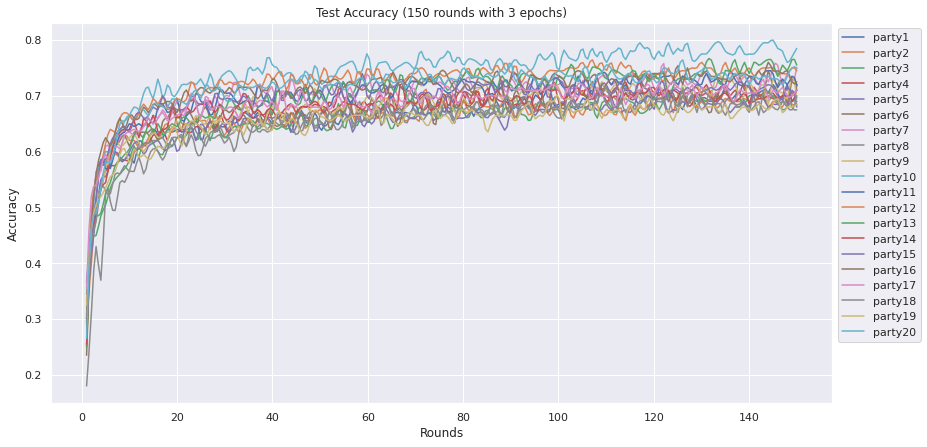

In [13]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Rounds')
# plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_accuracy.png', dpi=200)
plt.show()

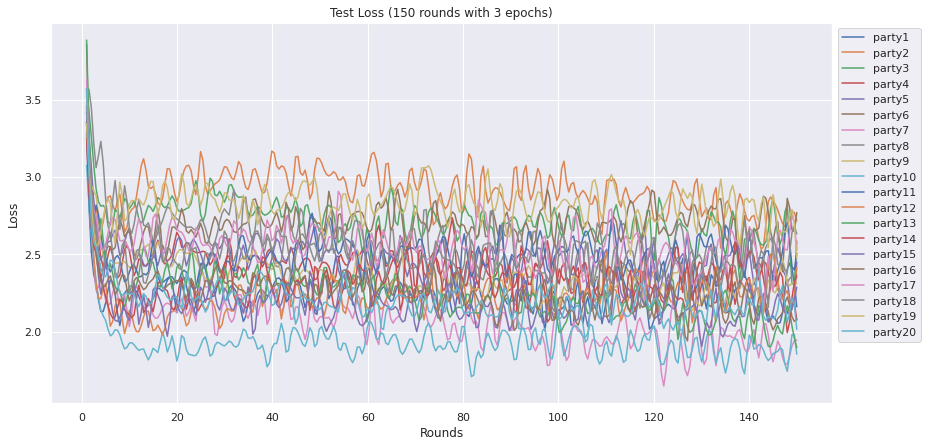

In [14]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Rounds')
# plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_loss.png', dpi=200)
plt.show()

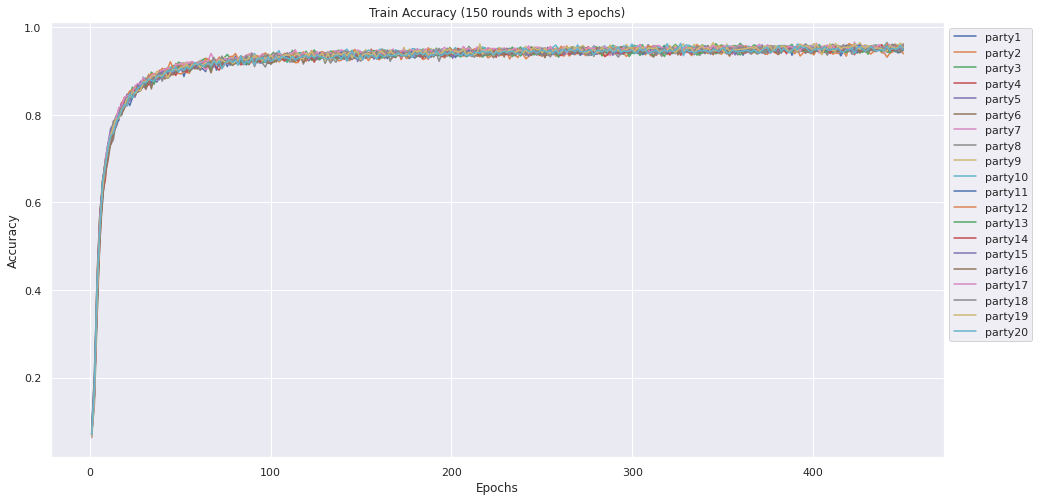

In [8]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_accuracy.png', dpi=200)
plt.show()

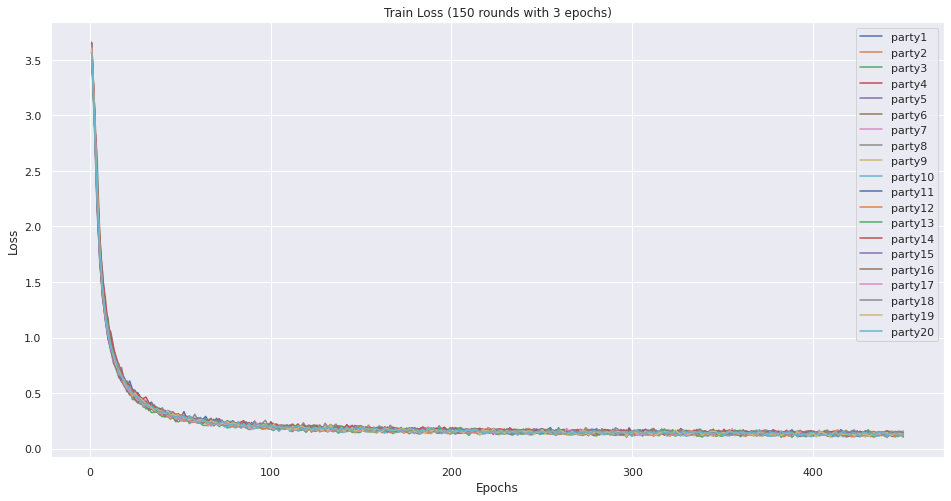

In [9]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_loss.png', dpi=200)
plt.show()

In [10]:
aggregator.model_synch()

2021-06-12T08:21:26.564Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating global model sync requests.
2021-06-12T08:21:26.567Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Sync Global Model<ibmfl.model.model_update.ModelUpdate object at 0x7f719fa760f0>
2021-06-12T08:21:26.567Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T08:21:28.372Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T08:21:28.373Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T08:21:28.373Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T08:21:28.374Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished sync model requests


In [11]:
aggregator.eval_model()

2021-06-12T08:21:28.379Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating evaluation requests.
2021-06-12T08:21:28.380Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T08:21:29.794Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T08:21:29.795Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T08:21:29.795Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T08:21:29.796Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished evaluate model requests.
2021-06-12T08:21:29.797Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished eval requests


In [12]:
aggregator.save_model()

2021-06-12T08:21:29.802Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating save model request.
2021-06-12T08:21:29.803Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T08:21:32.816Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T08:21:32.817Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T08:21:32.817Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T08:21:32.818Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished saving the models.
2021-06-12T08:21:32.819Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished save requests
